In [1]:
#!pip install matplotlib
#!pip install seaborn
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [2]:
#!pip install install openpyxl
df = pd.read_excel('dataset.xlsx', engine='openpyxl')


In [3]:
df = df[:3000]

In [4]:
df.label.value_counts()

1    110
0     91
Name: label, dtype: int64

In [5]:
df.shape

(201, 2)

In [6]:
df = df.sample(frac = 1)

In [7]:
df.head()

,text,label
82,"Oh God, why is it so hard to get to know new p...",1
107,"Panic, restlessness right now “ˆ",1
45,Need to get rid of various kinds of thoughts t...,1
75,I'm worried that the bad effects make my head ...,1
55,"I haven't slept well for 2 days, it's like I'm...",1


In [8]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
df.dropna()

,text,label
82,"Oh God, why is it so hard to get to know new p...",1
107,"Panic, restlessness right now “ˆ",1
45,Need to get rid of various kinds of thoughts t...,1
75,I'm worried that the bad effects make my head ...,1
55,"I haven't slept well for 2 days, it's like I'm...",1
...,...,...
43,been the most anxious before being the most si...,1
189,embarassing.,0
17,"I swear I was happy this time, eh, tbtb, I was...",1
18,"I'm too worried, it's just a weekly event",1


C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

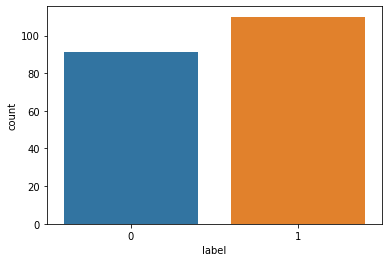

In [10]:
sns.countplot(df.label)

In [11]:
#!pip install spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
lm = WordNetLemmatizer()

In [12]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
def text_transformation(col):
    corpus = []
    for token in col:
        alphabet = re.sub('[^a-zA-Z]',' ',str(token))
        alphabet = alphabet.lower()
        alphabet = alphabet.split()
        a_lemmas = [lm.lemmatize(word) for word in alphabet if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in a_lemmas))
    return corpus

In [14]:
df['cleaned'] = text_transformation(df.text)

In [15]:
X = df.cleaned
y = df.label.astype(int)

In [16]:
vect = TfidfVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2),use_idf = True)

In [17]:
X_tfidf =vect.fit_transform(X).toarray()

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,stratify = y,test_size = 0.2,random_state = 1)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=400),
    'Support Vector Machine': SVC(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(class_weight='balanced', max_iter=400)),
        ('dt', DecisionTreeClassifier(class_weight='balanced')),
        ('rf', RandomForestClassifier(class_weight='balanced')),
        ('mnb', MultinomialNB()),
        ('svm', SVC(class_weight='balanced')),
        ('knn', KNeighborsClassifier()),
        ('ada', AdaBoostClassifier()),
        ('gb', GradientBoostingClassifier())
    ], voting='hard')
}

# Perform GridSearchCV for each classifier
for clf_name, clf in classifiers.items():
    # Define hyperparameters for grid search
    param_grid = {}
    if clf_name in ['Logistic Regression', 'Support Vector Machine']:
        param_grid = {'C': [0.1, 1, 10]}
    elif clf_name in ['KNN']:
        param_grid = {'n_neighbors': [3, 5, 7]}
    elif clf_name in ['Decision Tree', 'Random Forest']:
        param_grid = {'max_depth': [3, 5, 7]}
    elif clf_name in ['AdaBoost', 'Gradient Boosting']:
        param_grid = {'n_estimators': [50, 100, 150]}
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Print best hyperparameters
    print(f"Best hyperparameters for {clf_name}: {grid_search.best_params_}")
    
    # Train the model with best hyperparameters
    best_clf = grid_search.best_estimator_
    best_clf.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    k_fold_accuracy = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    # Print evaluation metrics
    print(f"Evaluation metrics for {clf_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"K-fold cross-validation accuracy: {k_fold_accuracy}")
    print(f"AUC Score: {auc_score}")


Best hyperparameters for Naive Bayes: {}
Evaluation metrics for Naive Bayes:
Accuracy: 0.7317073170731707
K-fold cross-validation accuracy: 0.65
AUC Score: 0.7105263157894737
Best hyperparameters for KNN: {'n_neighbors': 3}
Evaluation metrics for KNN:
Accuracy: 0.8048780487804879
K-fold cross-validation accuracy: 0.7375
AUC Score: 0.8181818181818181
Best hyperparameters for Logistic Regression: {'C': 10}
Evaluation metrics for Logistic Regression:
Accuracy: 0.926829268292683
K-fold cross-validation accuracy: 0.85
AUC Score: 0.9318181818181819
Best hyperparameters for Support Vector Machine: {'C': 10}
Evaluation metrics for Support Vector Machine:
Accuracy: 0.9024390243902439
K-fold cross-validation accuracy: 0.85625
AUC Score: 0.9019138755980862
Best hyperparameters for Decision Tree: {'max_depth': 7}
Evaluation metrics for Decision Tree:
Accuracy: 0.9512195121951219
K-fold cross-validation accuracy: 1.0
AUC Score: 0.9545454545454546
Best hyperparameters for Random Forest: {'max_depth'